## Pretrained VGGNet

We'll be using a pretrained network from https://github.com/machrisaa/tensorflow-vgg. 

In [2]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm

vgg_dir = 'tensorflow_vgg/'
# Make sure vgg exists
if not isdir(vgg_dir):
    raise Exception("VGG directory doesn't exist!")

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(vgg_dir + "vgg16.npy"):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='VGG16 Parameters') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/content.udacity-data.com/nd101/vgg16.npy',
            vgg_dir + 'vgg16.npy',
            pbar.hook)
else:
    
    print("Parameter file already exists!")

Parameter file already exists!


In [3]:
import os
import matplotlib as plt


import numpy as np
import tensorflow as tf

from tensorflow_vgg import vgg16
from tensorflow_vgg import utils

In [50]:
data_dir = "C:\\Users\\catarina\\Mask_RCNN\\Nuclei_stage1_train"
contents = os.listdir(data_dir)
classes = [each for each in contents if os.path.isdir(data_dir + each)] #change for filename instead of folder name
train_path="C:\\Users\\catarina\\Mask_RCNN\\Nuclei_stage1_train"
validation_path="C:\\Users\\catarina\\Mask_RCNN\\Nuclei_stage1_validation"
batch_size=10

In [5]:
len(contents)

670

In [6]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size = 5
codes_list = []
labels = []
batch = []
images=[]
codes = None

with tf.Session() as sess:
    vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    with tf.name_scope("content_vgg"):
        vgg.build(input_)

    for ii,each in enumerate(contents,1):
        
        im_path = train_path +"\\"+ each+"\\images"+"\\"+each+".png"
        
        
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
        img = utils.load_image(im_path)
            
        img = img[:,:,0:3]
        print(img.shape)
        batch.append(img.reshape((1, 224, 224, 3)))
          
            #labels.append(each)
            
            # Running the batch through the network to get the codes
            #if ii % batch_size == 0 or ii == len(files):
        if ii % batch_size == 0 or ii == len(contents):
                
                images = np.concatenate(batch)
                #print(images.shape)
                feed_dict = {input_: images}
                codes_batch = sess.run(vgg.relu6, feed_dict=feed_dict)
                
                # Here I'm building an array of the codes
                if codes is None:
                    codes = codes_batch
                else:
                    codes = np.concatenate((codes, codes_batch))
                
                # Reset to start building the next batch
                batch = []
                print('{} images processed'.format(ii))

C:\Users\catarina\Mask_RCNN\tensorflow_vgg\vgg16.npy
npy file loaded
build model started
build model finished: 0s
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
5 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
10 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
15 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
20 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
25 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
30 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
35 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
40 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
45 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
50 imag

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
450 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
455 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
460 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
465 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
470 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
475 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
480 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
485 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
490 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
495 images processed
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
500 images processed

In [12]:
codes.shape

(670, 4096)

In [10]:
# write codes to file
with open('codes', 'w') as f:
    codes.tofile(f)

In [11]:
with open('codes') as f:
    codes = np.fromfile(f, dtype=np.float32)
    codes = codes.reshape((len(contents), -1))

In [ ]:
## Hierarchical Clustering: a dendogram

In [13]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [ ]:
codes.shape

In [14]:
Z = linkage(codes, 'ward')

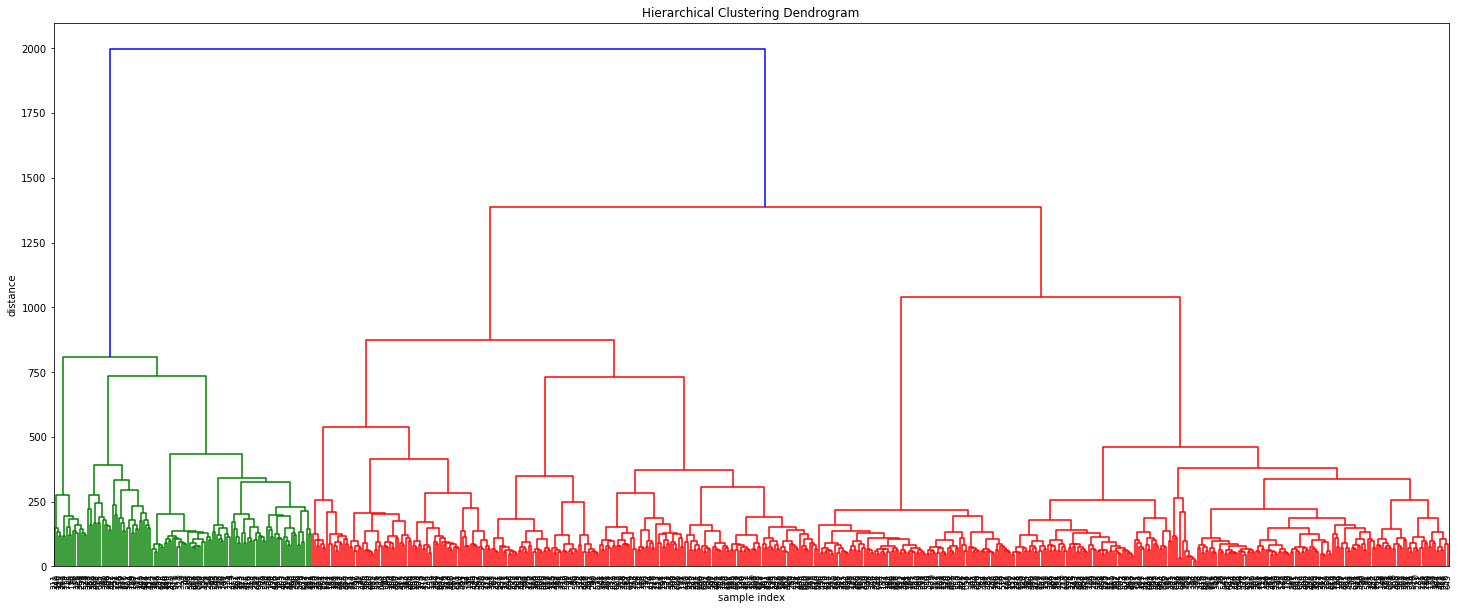

In [15]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [27]:

from scipy.cluster.hierarchy import fcluster
max_d = 900
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters)

array([1, 2, 3, 4], dtype=int32)

In [28]:
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
for i,each in enumerate(clusters):
    if each==1:
        cluster_1.append(i)
    elif each==2:
        cluster_2.append(i)
    elif each==3:
        cluster_3.append(i)
    else:
        cluster_4.append(i)

In [24]:
import random

In [25]:
round(0.2*len(cluster_1))

25

In [ ]:
# Building training and validation set with equal porpotion of images classes

In [30]:
cluster_1_val=random.sample(cluster_1,round(0.2*len(cluster_1)))
cluster_1_train = [x for x in cluster_1 if x not in cluster_1_val]

In [34]:
cluster_2_val=random.sample(cluster_2,round(0.2*len(cluster_2)))
cluster_2_train = [x for x in cluster_2 if x not in cluster_2_val]

In [35]:
cluster_3_val=random.sample(cluster_3,round(0.2*len(cluster_3)))
cluster_3_train = [x for x in cluster_3 if x not in cluster_3_val]

In [36]:
cluster_4_val=random.sample(cluster_4,round(0.2*len(cluster_3)))
cluster_4_train = [x for x in cluster_4 if x not in cluster_4_val]

In [37]:
train= np.concatenate((cluster_1_train, cluster_2_train,cluster_3_train,cluster_4_train))
validation=np.concatenate((cluster_1_val, cluster_2_val,cluster_3_val,cluster_4_val))

In [38]:
train.shape

(558,)

In [39]:
validation.shape


(112,)

In [41]:
train_folders=[id for i,id in enumerate(contents) if i in train]

In [42]:
validation_folders=[id for i,id in enumerate(contents) if i in validation]

In [45]:
import shutil

In [52]:
#for validation delete the training folders
for id_folder in train_folders:
    shutil.rmtree("C:\\Users\\catarina\\Mask_RCNN\\Nuclei_stage1_validation\\"+id_folder)

In [53]:
#for training delete the validation folders
for id_folder in validation_folders:
    shutil.rmtree("C:\\Users\\catarina\\Mask_RCNN\\Nuclei_stage1_train\\"+id_folder)